## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [5]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
train, test = keras.datasets.cifar10.load_data()

In [7]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [8]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2,1e-3,1e-4,1e-5]
#LEARNING_RATE = [1e-1]
OPTIMIZER=['SGD','RMSprop','AdaGrad','Adam']
#OPTIMIZER=['AdaGrad','Adam']

EPOCHS = 50 #0
BATCH_SIZE = 256
MOMENTUM = 0.95

In [11]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for op in OPTIMIZER:
    for lr in LEARNING_RATE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print(op+" Experiment with LR = %.6f" % (lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        
        if op=='SGD':
            optimizer = keras.optimizers.SGD(lr=lr)
        if op=='RMSprop':
            optimizer = keras.optimizers.RMSprop(lr=lr)
        if op=='AdaGrad':
            optimizer = keras.optimizers.Adagrad(lr=lr)        
        if op=='Adam':
            optimizer = keras.optimizers.Adam(lr=lr)              
        
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = op+"_exp-lr-%s" % str(lr)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

SGD Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [========================

50000/50000 [==============================] - 2s 39us/step - loss: 0.7957 - acc: 0.7176 - val_loss: 1.7086 - val_acc: 0.47830s - loss: 0.7886 - acc: 0
Epoch 49/50
50000/50000 [==============================] - 2s 39us/step - loss: 0.7788 - acc: 0.7218 - val_loss: 1.5741 - val_acc: 0.5149
Epoch 50/50
50000/50000 [==============================] - 2s 40us/step - loss: 0.7550 - acc: 0.7348 - val_loss: 1.6531 - val_acc: 0.5035s - loss: 0.7553 - acc: 0.7
SGD Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________

50000/50000 [==============================] - 2s 39us/step - loss: 1.3135 - acc: 0.5388 - val_loss: 1.5179 - val_acc: 0.4673
Epoch 41/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.2959 - acc: 0.5464 - val_loss: 1.4034 - val_acc: 0.4953
Epoch 42/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.2954 - acc: 0.5477 - val_loss: 1.3800 - val_acc: 0.5113
Epoch 43/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.2860 - acc: 0.5506 - val_loss: 1.4522 - val_acc: 0.4922
Epoch 44/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.2807 - acc: 0.5512 - val_loss: 1.3740 - val_acc: 0.5090
Epoch 45/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.2715 - acc: 0.5540 - val_loss: 1.3692 - val_acc: 0.5129745 - acc: 
Epoch 46/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.2611 - acc: 0.5582 - val_loss: 1.5550 - val_acc: 0.4586: 1.2619 - acc: 0.55 - ETA: 0s - los

50000/50000 [==============================] - 2s 40us/step - loss: 1.7341 - acc: 0.3972 - val_loss: 1.7364 - val_acc: 0.3941: 1s - loss: 1.729 - ETA: 0s - loss: 1.7312 - acc:
Epoch 35/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.7295 - acc: 0.3989 - val_loss: 1.7343 - val_acc: 0.3945
Epoch 36/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.7251 - acc: 0.4010 - val_loss: 1.7279 - val_acc: 0.3971
Epoch 37/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.7211 - acc: 0.4029 - val_loss: 1.7246 - val_acc: 0.4013ss: 1.7188 - acc: 0. - ETA: 0s - loss: 1.7206 - acc: 0.
Epoch 38/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.7169 - acc: 0.4032 - val_loss: 1.7201 - val_acc: 0.4002
Epoch 39/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.7128 - acc: 0.4056 - val_loss: 1.7159 - val_acc: 0.4025 loss: 1.705
Epoch 40/50
50000/50000 [==============================] - 2s 39us/

50000/50000 [==============================] - 2s 39us/step - loss: 2.1506 - acc: 0.2480 - val_loss: 2.1506 - val_acc: 0.25020s - loss: 2.1542 - acc: 0.243 - ETA: 0s - loss: 2.1538 - a - ETA: 0s - loss: 2.1508 - acc: 0.
Epoch 24/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.1455 - acc: 0.2511 - val_loss: 2.1455 - val_acc: 0.2521
Epoch 25/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.1405 - acc: 0.2526 - val_loss: 2.1406 - val_acc: 0.2543
Epoch 26/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.1356 - acc: 0.2553 - val_loss: 2.1357 - val_acc: 0.2572
Epoch 27/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.1308 - acc: 0.2575 - val_loss: 2.1310 - val_acc: 0.2585
Epoch 28/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.1262 - acc: 0.2590 - val_loss: 2.1263 - val_acc: 0.2607
Epoch 29/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.1216 - a

50000/50000 [==============================] - 2s 39us/step - loss: 2.2870 - acc: 0.1480 - val_loss: 2.2831 - val_acc: 0.1558
Epoch 18/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.2852 - acc: 0.1491 - val_loss: 2.2813 - val_acc: 0.1581: 0s - loss: 2.2874 - ac - ETA: 0s - loss: 2.2857 - acc:
Epoch 19/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.2834 - acc: 0.1501 - val_loss: 2.2795 - val_acc: 0.1593s: 2.2843 - acc: 
Epoch 20/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.2817 - acc: 0.1514 - val_loss: 2.2778 - val_acc: 0.1594
Epoch 21/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.2800 - acc: 0.1518 - val_loss: 2.2762 - val_acc: 0.1598s - loss: 2.2801 - acc - ETA: 0s - loss: 2.2815 - acc: 0.14 - ETA: 0s - loss: 2.2812 - acc: 0.1 - ETA: 0s - loss: 2.2809 - acc: 
Epoch 22/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.2784 - acc: 0.1528 - val_loss: 2.2746 -

50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000loss: - ETA: 0s - loss: 14.5301 - acc - ETA: 0s - loss: 14.5282 - acc: 0.09 - ETA: 0s - loss: 14.5267 - acc - ETA: 0s - loss: 14.5172 - acc
Epoch 12/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000.4672 - a - ETA: 0s - loss: 14.4788 - acc - ETA: 0s - loss: 14.4939 -
Epoch 15/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.10001 - acc
Epoch 16/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.

50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.10001 - ETA: 0s - loss: 14.5065 - acc: 0.10
Epoch 4/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000s - loss: 14.5082 - acc: 0.09
Epoch 5/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000ss: 14.
Epoch 6/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000ss: 14.5124 - acc: 
Epoch 7/50
50000/50000 [==============================] - 2s 44us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000- los
Epoch 8/50
50000/50000 [==============================] - 2s 44us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000.10 - ETA: 0s - loss: 14.5102 - acc: 0. - ETA: 0s - loss: 14.4973 - acc:  - ETA

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 47us/step - loss: 2.3270 - acc: 0.2081 - val_loss: 2.4674 - val_acc: 0.1887A: 2s - loss: 3.3644 - acc - ETA: 1s - loss: 2.
Epoch 2/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.8851 - acc: 0.3180 - val_loss: 1.8598 - val_acc: 0.3274ss: 1.9186 - acc: 0.30 - ETA: 0s - loss: 1.9116 
Epoch 3/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.7790 - acc: 0.3612 - val_loss: 1.8577 - val_acc: 0.3390
Epoch 4/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.7149 - acc: 0.3898 - val_loss: 1.6702 - val_acc: 0.4010- loss: 1.7252 
Epoch 5/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.6539 - acc: 0.4084 - val_loss: 1.6222 - val_acc: 0.4091.6561 - acc:  - ETA: 0s - loss: 1.6565 - acc: 0
Epoch 6/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.6080 - acc: 0.4244 - val_lo

50000/50000 [==============================] - 2s 43us/step - loss: 0.8090 - acc: 0.7090 - val_loss: 1.8683 - val_acc: 0.4948ss: 0.8012 -  - ETA: 0s - loss: 0.8076 - acc: 0.709
Epoch 50/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.7977 - acc: 0.7169 - val_loss: 1.9484 - val_acc: 0.4797ss: 0.7849 -
RMSprop Experiment with LR = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________

50000/50000 [==============================] - 2s 43us/step - loss: 1.0586 - acc: 0.6292 - val_loss: 1.4338 - val_acc: 0.5118 - acc: 0
Epoch 40/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.0472 - acc: 0.6351 - val_loss: 1.3887 - val_acc: 0.51961.0453 - acc: 0.6
Epoch 41/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.0339 - acc: 0.6384 - val_loss: 1.3689 - val_acc: 0.5134 1s - loss: 1.0
Epoch 42/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.0258 - acc: 0.6431 - val_loss: 1.5308 - val_acc: 0.4818ss: 1.0194 - acc: 0. - ETA: 0s - loss: 1.0230 -  - ETA: 0s - loss: 1.0264 - acc: 0.643
Epoch 43/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.0137 - acc: 0.6454 - val_loss: 1.3630 - val_acc: 0.5232 0s - loss: 1.0080 - acc: 0.646 - ETA: 0s - loss: 1.0082 - a
Epoch 44/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.0068 - acc: 0.6509 - val_loss: 1.4980 - val_acc: 0.49

50000/50000 [==============================] - 2s 44us/step - loss: 1.5268 - acc: 0.4697 - val_loss: 1.5504 - val_acc: 0.4586 - loss: 1.5277 - acc: 0 - ETA: 0s - loss: 1.5248 - acc: 0.470 - ETA: 0s - loss: 1.5258 - acc: 0
Epoch 28/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.5204 - acc: 0.4709 - val_loss: 1.5641 - val_acc: 0.4490loss: 1.5194 - acc: 0.473 - ETA: 0s - loss: 1.5169 - acc: 0.474 - ETA: 0s - loss: 1.5165 - acc: 0. - ETA: 0s - loss: 1.5156 - acc: 0.47 - ETA: 0s - loss: 1.5178 - acc:
Epoch 29/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.5146 - acc: 0.4736 - val_loss: 1.5571 - val_acc: 0.4492
Epoch 30/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.5080 - acc: 0.4764 - val_loss: 1.5351 - val_acc: 0.4623 loss: 1.5071 - a - ETA: 0s - loss: 1.5099 - acc: 0. - ETA: 0s - loss: 1.5090 - acc: 0.475
Epoch 31/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.5016 - acc: 0.4774 - val_

50000/50000 [==============================] - 2s 42us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000: 14.5146
Epoch 18/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000- loss: 14.5046 - acc: 0.10 - ETA: 0s - loss: 14.5023 - acc: 0.10 - ETA: 0s - loss: 14.5047 - acc: 0.
Epoch 21/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000ss: 14.5199 - a - ETA: 0s - loss:
Epoch 22/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000c: 0.
Epoch 23/50
50000/50000 

50000/50000 [==============================] - 2s 42us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000s - loss: 14.51 - ETA: 0s - loss: 14.5075 - a
Epoch 10/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000ETA: 0s - loss: 14.5269 - acc: 0. - ETA: 0s - loss: 14.5246 - acc: 0.09 - ETA: 0s - loss: 14.5208 - acc: 
Epoch 13/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000ss: 14.5012 - a
Epoch 14/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000 0s - lo

50000/50000 [==============================] - 2s 47us/step - loss: 2.0042 - acc: 0.2792 - val_loss: 1.8848 - val_acc: 0.3230s - loss: 2.1806 - acc: 0.20 - ETA: 1s - loss: 2
Epoch 2/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.8025 - acc: 0.3634 - val_loss: 1.7808 - val_acc: 0.3636
Epoch 3/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.7295 - acc: 0.3925 - val_loss: 1.7304 - val_acc: 0.3793
Epoch 4/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.6789 - acc: 0.4109 - val_loss: 1.7222 - val_acc: 0.37746815 - ac
Epoch 5/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.6421 - acc: 0.4217 - val_loss: 1.6635 - val_acc: 0.4099: 1s - loss: 1.6472  - ETA: 0s - loss: 1.6453 - acc: 0 - ETA: 0s - loss: 1.6425 - acc: 0.4
Epoch 6/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.6126 - acc: 0.4367 - val_loss: 1.6189 - val_acc: 0.4314
Epoch 7/50
50000/50000 [==================

50000/50000 [==============================] - 2s 43us/step - loss: 1.2711 - acc: 0.5590 - val_loss: 1.4004 - val_acc: 0.5061loss: 1.2718 - acc: - ETA: 0s - loss: 1.2744 - acc: 0 - ETA: 0s - loss: 1.2748 - acc: 0.
Epoch 45/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.2673 - acc: 0.5599 - val_loss: 1.3929 - val_acc: 0.5067: 0s - loss: 1.2672 - acc: 0.560
Epoch 46/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.2620 - acc: 0.5613 - val_loss: 1.3825 - val_acc: 0.5117
Epoch 47/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.2586 - acc: 0.5648 - val_loss: 1.3638 - val_acc: 0.5206oss: 1.2630 - acc: 0.563 - ETA: 0s - loss: 1.2601 - acc: 0.56 - ETA: 0s - loss: 1.2578 - acc: 0.5 - ETA: 0s - loss: 1.2593 - acc: 0.564 - ETA: 0s - loss: 1.2601 - a
Epoch 48/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.2537 - acc: 0.5655 - val_loss: 1.3744 - val_acc: 0.5169: 0s - loss: 1.2574 - acc:
Epoch 49/50


50000/50000 [==============================] - 2s 43us/step - loss: 1.6734 - acc: 0.4252 - val_loss: 1.6852 - val_acc: 0.4211 1s - loss: 1.67 - ETA: 0s - loss: 1.6732 - acc: 0.
Epoch 37/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.6708 - acc: 0.4257 - val_loss: 1.6835 - val_acc: 0.4197 loss: 1.6734 - acc: 0.423 - ETA: 0s - loss: 1.6736 - ac - ETA: 0s - loss: 1.6710 - acc: 0.4
Epoch 38/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.6685 - acc: 0.4272 - val_loss: 1.6809 - val_acc: 0.4213: 1.6698 - acc:
Epoch 39/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.6660 - acc: 0.4268 - val_loss: 1.6790 - val_acc: 0.4209s: 1.6638 - acc: 0.4 - ETA: 0s - loss: 1.6661 - acc: 0.42 - ETA: 0s - loss: 1.6657 - ac
Epoch 40/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.6638 - acc: 0.4277 - val_loss: 1.6767 - val_acc: 0.4244A: 1s - loss: 1.6650 - acc: 0.425 - ETA: 1s - loss: 1.6638 - ac - ETA: 0s - lo

50000/50000 [==============================] - 2s 42us/step - loss: 2.0447 - acc: 0.2886 - val_loss: 2.0414 - val_acc: 0.2888A: 0s - loss: 2.0447 - acc:
Epoch 25/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.0415 - acc: 0.2906 - val_loss: 2.0383 - val_acc: 0.2911s - loss: 2.0424 
Epoch 26/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.0385 - acc: 0.2923 - val_loss: 2.0353 - val_acc: 0.2912 0s - loss: 2.0401
Epoch 27/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.0355 - acc: 0.2934 - val_loss: 2.0324 - val_acc: 0.2918- loss: 2.0334 - acc: - ETA: 0s - loss: 2.0340 - acc: 0 - ETA: 0s - loss: 2.0341 - acc: 0. - ETA: 0s - loss: 2.0354 - acc: 0.293
Epoch 28/50
50000/50000 [==============================] - 2s 42us/step - loss: 2.0327 - acc: 0.2942 - val_loss: 2.0296 - val_acc: 0.2939: 1s - loss: 2.0301 - a - ETA: 0s - loss: 2.0324 - acc: 0. - ETA: 0s - loss: 2.0323 - acc: 0.29 - ETA: 0s - loss: 2.0329 - acc: 0.294

50000/50000 [==============================] - 2s 45us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000acc - ETA: 0s - loss: 14.5126 - acc: 0.09 - ETA: 0s - loss: 14.5219 - acc: 0.09 - ETA: 0s - loss: 14.51
Epoch 15/50
50000/50000 [==============================] - 2s 45us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.100014.5102 - acc: 0.09 - ETA: 0s - loss: 14.5120 - a
Epoch 16/50
50000/50000 [==============================] - 2s 46us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.10002 - ETA: 0s - loss: 14.5188 - acc: 0.09 - ETA: 0s - loss: 14.5173 - acc: 0.09 - ETA: 0s - loss: 14.
Epoch 17/50
50000/50000 [==============================] - 2s 46us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/50
50000/50000 [==============================] - 2s 45us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/50
50000/50000 [==============================] - 2s

50000/50000 [==============================] - 2s 45us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000s - loss: 14.48 - ETA: 0s - loss: 14.5072 - acc: 0. - ETA: 0s - loss: 14.5084 - acc - ETA: 0s - loss: 14.5074 - acc: 0.
Epoch 4/50
50000/50000 [==============================] - 2s 45us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 46us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s 45us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000.5116 - acc: 0.09 - ETA: 0s - loss: 14.5086 - acc: 0.09
Epoch 7/50
50000/50000 [==============================] - 2s 45us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 2s 45us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000A: 0

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.8999 - acc: 0.3153 - val_loss: 1.7516 - val_acc: 0.3692oss: 1.9083 - acc: 0.31
Epoch 2/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.6923 - acc: 0.3936 - val_loss: 1.6702 - val_acc: 0.4100loss: 1.7111 - acc - ETA: 0s - loss: 1.6956 - acc: 0.39
Epoch 3/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.6064 - acc: 0.4266 - val_loss: 1.5820 - val_acc: 0.4260 1s - loss: 1.6287 - acc: 0.42 - ETA: 1s - loss: 1.6179 -  - ETA: 0s - loss: 1.6118 - acc: 0. - ETA: 0s - loss: 1.6093 - acc: 
Epoch 4/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.5429 - acc: 0.4514 - val_loss: 1.5438 - val_acc: 0.4450
Epoch 5/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.4962 - acc: 0.4684 - val_loss: 1.5101 - val_acc: 0.4600
Epoch 6/50
50000/50000 [==============================] - 2s 

50000/50000 [==============================] - 2s 45us/step - loss: 0.6857 - acc: 0.7548 - val_loss: 1.7134 - val_acc: 0.5132 - loss: 0.6806 - acc
Epoch 46/50
50000/50000 [==============================] - 2s 45us/step - loss: 0.6709 - acc: 0.7603 - val_loss: 1.7527 - val_acc: 0.5170- loss: 0.6552 -  - ETA: 0s - loss: 0.6686 - acc: - ETA: 0s - loss: 0.6702 - acc: 0.76
Epoch 47/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.6690 - acc: 0.7601 - val_loss: 1.7849 - val_acc: 0.5175- loss: 0.6542 - acc:  - ETA: 0s - loss: 0.6558 -  - ETA: 0s - loss: 0.6665 - acc: 0.7 - ETA: 0s - loss: 0.6676 - acc: 0.760
Epoch 48/50
50000/50000 [==============================] - 2s 45us/step - loss: 0.6537 - acc: 0.7675 - val_loss: 1.7846 - val_acc: 0.5181.6538 - acc: 0.767
Epoch 49/50
50000/50000 [==============================] - 2s 45us/step - loss: 0.6254 - acc: 0.7756 - val_loss: 1.7890 - val_acc: 0.5165
Epoch 50/50
50000/50000 [==============================] - 2s 45us/step -

50000/50000 [==============================] - 2s 45us/step - loss: 1.0342 - acc: 0.6412 - val_loss: 1.3298 - val_acc: 0.5357: 1.0348 - acc - ETA: 0s - loss: 1.0333 - acc: 0.641
Epoch 33/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.0178 - acc: 0.6461 - val_loss: 1.3134 - val_acc: 0.5411
Epoch 34/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.0033 - acc: 0.6521 - val_loss: 1.3195 - val_acc: 0.5428- loss: 0.9911 - acc: - ETA: 0s - loss: 1.0015 - acc: 0.6 - ETA: 0s - loss: 1.0007 - 
Epoch 35/50
50000/50000 [==============================] - 2s 45us/step - loss: 0.9903 - acc: 0.6565 - val_loss: 1.3214 - val_acc: 0.5434
Epoch 36/50
50000/50000 [==============================] - 2s 45us/step - loss: 0.9775 - acc: 0.6600 - val_loss: 1.3788 - val_acc: 0.5290.9766 - acc: 0.6
Epoch 37/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.9676 - acc: 0.6624 - val_loss: 1.3363 - val_acc: 0.5378 0s - loss: 0.9711 - acc: 
Epoch

50000/50000 [==============================] - 2s 45us/step - loss: 1.5267 - acc: 0.4694 - val_loss: 1.5439 - val_acc: 0.4601: 1s - loss: 1.5265 - acc: 0.47 - ETA: 1s - loss: 1.5244 - ETA: 0s - loss: 1.5271 - acc: 0.4
Epoch 23/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.5176 - acc: 0.4720 - val_loss: 1.5398 - val_acc: 0.4607A: 0s - loss: 1.5204 - acc: 0 - ETA: 0s - loss: 1.5180 - acc: 0.472 - ETA: 0s - loss: 1.5178 - acc: 0.472
Epoch 24/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.5111 - acc: 0.4748 - val_loss: 1.5327 - val_acc: 0.4592
Epoch 25/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.5020 - acc: 0.4778 - val_loss: 1.5264 - val_acc: 0.4664A: 0s - loss: 1.5026 - acc - ETA: 0s - loss: 1.5009 - acc:
Epoch 26/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.4947 - acc: 0.4788 - val_loss: 1.5226 - val_acc: 0.4629
Epoch 27/50
50000/50000 [==============================] - 2s 45us/

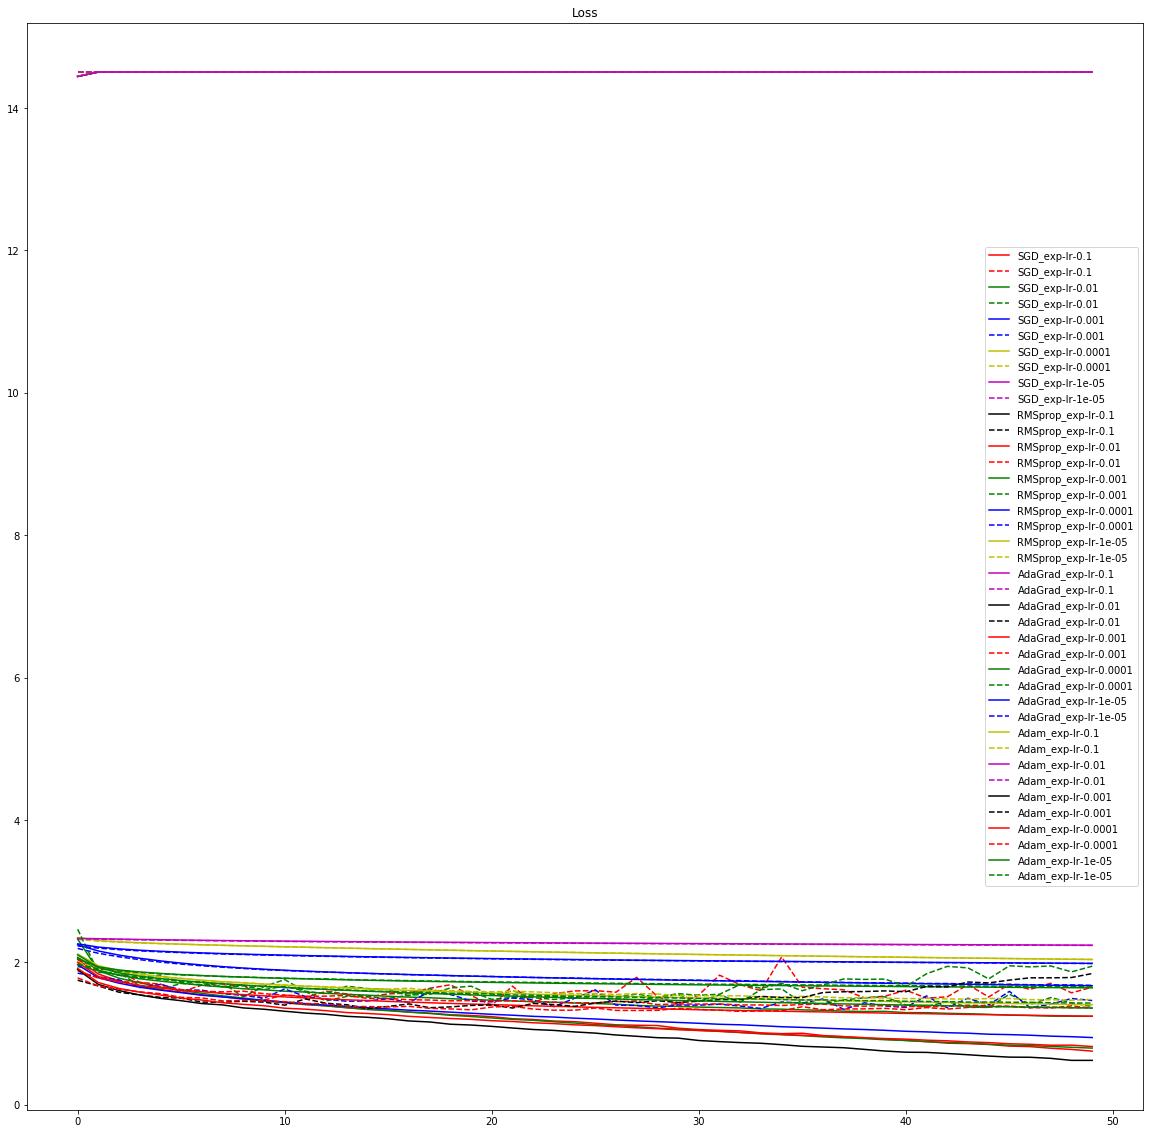

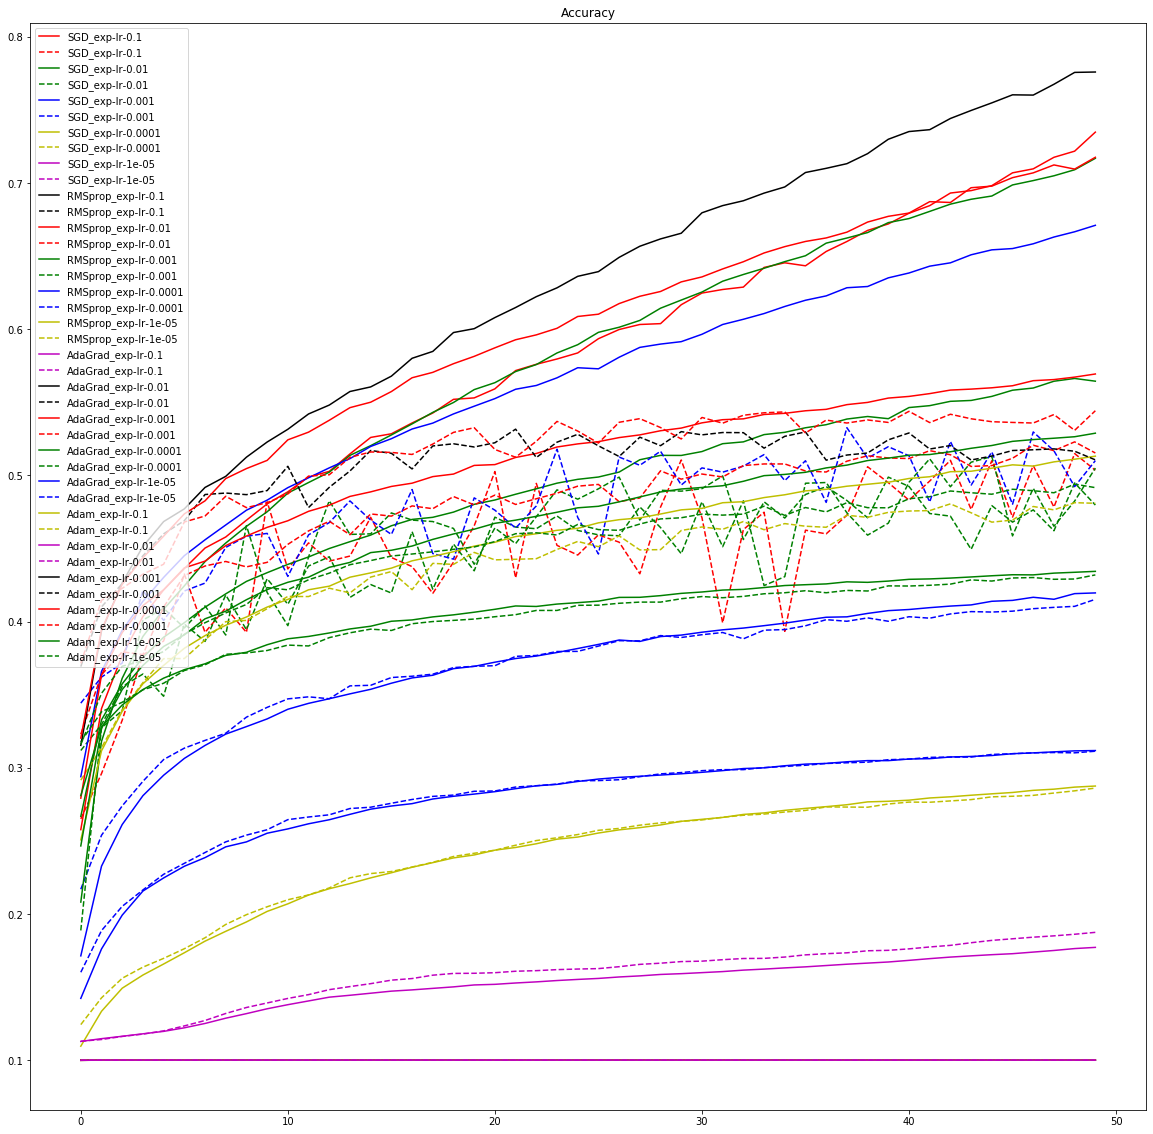

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k","r", "g", "b", "y", "m", "k","r", "g", "b", "y", "m", "k","r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(20,20))
for i, cond in enumerate(results.keys()):
    #print(i,cond)
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()


plt.figure(figsize=(20,20))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()